<a href="https://colab.research.google.com/github/Bikomwangi/Supermarket.Marketing.Strategies/blob/main/Part_3_Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# loading the required libraries
#install.packages("arules")
library(arules)
library(arulesViz)
library(rattle)

In [11]:
# loading the dataset
path <-  "http://bit.ly/SupermarketDatasetII"
data <- read.transactions(path)


Warning message in asMethod(object):
“removing duplicated items in transactions”


In [33]:
# previewing the shape
dim(data)

[1] 7501 5729

In [14]:
# verifying the object's class
class(data)

[1] "transactions"
attr(,"package")
[1] "arules"

In [15]:
# previewing the first five transactions
inspect(data[1:5])

    items                              
[1] {cheese,energy,                    
     drink,tomato,                     
     fat,                              
     flour,yams,cottage,               
     grapes,whole,                     
     juice,frozen,                     
     juice,low,                        
     mix,green,                        
     oil,                              
     shrimp,almonds,avocado,vegetables,
     smoothie,spinach,olive,           
     tea,honey,salad,mineral,          
     water,salmon,antioxydant,         
     weat,                             
     yogurt,green}                     
[2] {burgers,meatballs,eggs}           
[3] {chutney}                          
[4] {turkey,avocado}                   
[5] {bar,whole,                        
     mineral,                          
     rice,green,                       
     tea,                              
     water,milk,energy,                
     wheat}                            


The first item has a wide range of items

In [34]:
# Exploring the frequency of some articles  
# 
itemFrequency(data[, 1:10],type = "absolute")
# percentage terms of total transactions
round(itemFrequency(data[, 1:10],type = "relative")*100,2)

&                            accessories 
                                   371                                     10 
               accessories,antioxydant            accessories,champagne,fresh 
                                     1                                      1 
         accessories,champagne,protein                  accessories,chocolate 
                                     1                                      1 
accessories,chocolate,champagne,frozen           accessories,chocolate,frozen 
                                     1                                      1 
             accessories,chocolate,low       accessories,chocolate,pasta,salt 
                                     1                                      1

&                            accessories 
                                  4.95                                   0.13 
               accessories,antioxydant            accessories,champagne,fresh 
                                  0.01                                   0.01 
         accessories,champagne,protein                  accessories,chocolate 
                                  0.01                                   0.01 
accessories,chocolate,champagne,frozen           accessories,chocolate,frozen 
                                  0.01                                   0.01 
             accessories,chocolate,low       accessories,chocolate,pasta,salt 
                                  0.01                                   0.01

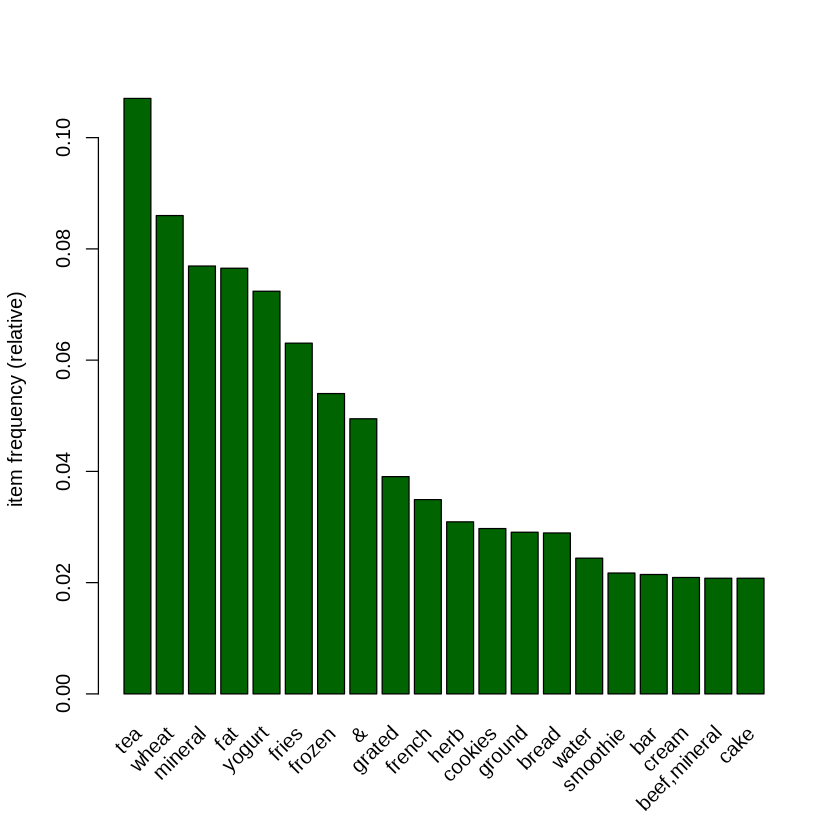

In [18]:
# Producing a chart of frequencies and fitering top 20 items
itemFrequencyPlot(data, topN = 20,col="darkgreen")

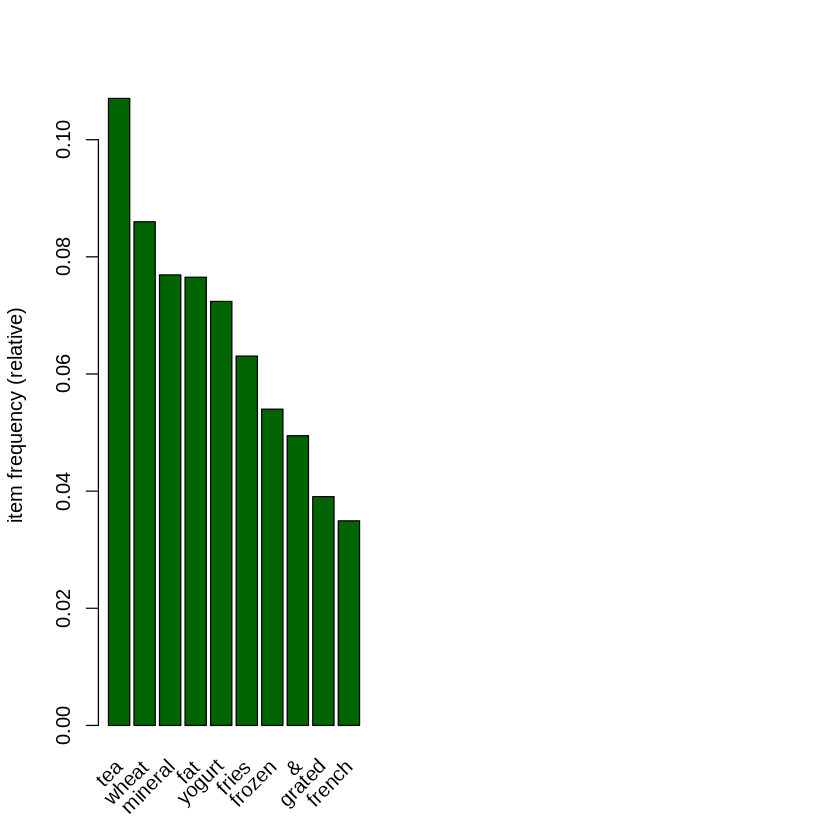

In [35]:
# Producing a chart of frequencies and fitering 
# to consider only items with a minimum percentage 
# of support/ considering a top x of items
# Displaying top 10 most common items in the transactions dataset 
# and the items whose relative importance is at least 10%
# 
par(mfrow = c(1, 2))

# plot the frequency of items
itemFrequencyPlot(data, topN = 10,col="darkgreen")

In [73]:
# Building a model based on association rules 
# using the apriori function 
# ---
# We use Min Support as 0.07 and confidence as 0.7
# ie 7% relative importance

rules <- apriori (data, parameter = list(supp = 0.002, conf = 0.8))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5729 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [189 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [99 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 99 rules 

In [74]:
# Getting the size of rules,rule length distribution and more statistical information such as support, lift and confidence 
# coverage and count
summary(rules)

set of 99 rules

rule length distribution (lhs + rhs):sizes
 2  3  4 
49 47  3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.535   3.000   4.000 

summary of quality measures:
    support           confidence        coverage             lift        
 Min.   :0.002133   Min.   :0.8125   Min.   :0.002133   Min.   :  7.611  
 1st Qu.:0.002533   1st Qu.:0.9394   1st Qu.:0.002600   1st Qu.: 11.629  
 Median :0.003333   Median :1.0000   Median :0.003466   Median : 13.068  
 Mean   :0.005498   Mean   :0.9601   Mean   :0.005785   Mean   : 19.486  
 3rd Qu.:0.004666   3rd Qu.:1.0000   3rd Qu.:0.004866   3rd Qu.: 19.044  
 Max.   :0.068391   Max.   :1.0000   Max.   :0.076523   Max.   :197.395  
     count       
 Min.   : 16.00  
 1st Qu.: 19.00  
 Median : 25.00  
 Mean   : 41.24  
 3rd Qu.: 35.00  
 Max.   :513.00  

mining info:
 data ntransactions support confidence
 data          7501   0.002        0.8

In [75]:
inspect(rules[1:5])


    lhs                 rhs     support     confidence coverage    lift     
[1] {candy}          => {bars}  0.003066258 0.9200000  0.003332889 100.01333
[2] {eggs,whole}     => {wheat} 0.002266364 0.9444444  0.002399680  10.98338
[3] {mayo,green}     => {tea}   0.002133049 1.0000000  0.002133049   9.34122
[4] {smoothie,green} => {tea}   0.002133049 1.0000000  0.002133049   9.34122
[5] {drink,green}    => {tea}   0.002133049 1.0000000  0.002133049   9.34122
    count
[1] 23   
[2] 17   
[3] 16   
[4] 16   
[5] 16   


In [76]:
# 
rules<-sort(rules, by="confidence", decreasing=TRUE)

rules
inspect(rules)

set of 99 rules 

     lhs                           rhs            support     confidence
[1]  {mayo,green}               => {tea}          0.002133049 1.0000000 
[2]  {smoothie,green}           => {tea}          0.002133049 1.0000000 
[3]  {drink,green}              => {tea}          0.002133049 1.0000000 
[4]  {oil,low}                  => {fat}          0.002799627 1.0000000 
[5]  {pepper,whole}             => {wheat}        0.002399680 1.0000000 
[6]  {burgers,herb}             => {&}            0.002399680 1.0000000 
[7]  {pepper,red}               => {&}            0.002399680 1.0000000 
[8]  {turkey,herb}              => {&}            0.003199573 1.0000000 
[9]  {smoothie,low}             => {fat}          0.003066258 1.0000000 
[10] {low}                      => {fat}          0.006132516 1.0000000 
[11] {flour,french}             => {weat}         0.002133049 1.0000000 
[12] {pasta,spaghetti,mineral}  => {wheat}        0.002666311 1.0000000 
[13] {pasta,mineral}            => {wheat}        0

In [77]:
# Observing first 10 model rules in descending order of confidence level by sorting rules in descending order
rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:10])

     lhs                 rhs     support     confidence coverage    lift    
[1]  {mayo,green}     => {tea}   0.002133049 1          0.002133049  9.34122
[2]  {smoothie,green} => {tea}   0.002133049 1          0.002133049  9.34122
[3]  {drink,green}    => {tea}   0.002133049 1          0.002133049  9.34122
[4]  {oil,low}        => {fat}   0.002799627 1          0.002799627 13.06794
[5]  {pepper,whole}   => {wheat} 0.002399680 1          0.002399680 11.62946
[6]  {burgers,herb}   => {&}     0.002399680 1          0.002399680 20.21833
[7]  {pepper,red}     => {&}     0.002399680 1          0.002399680 20.21833
[8]  {turkey,herb}    => {&}     0.003199573 1          0.003199573 20.21833
[9]  {smoothie,low}   => {fat}   0.003066258 1          0.003066258 13.06794
[10] {low}            => {fat}   0.006132516 1          0.006132516 13.06794
     count
[1]  16   
[2]  16   
[3]  16   
[4]  21   
[5]  18   
[6]  18   
[7]  18   
[8]  24   
[9]  23   
[10] 46   
